**Import Statements**

In [221]:
# sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
# pyplot
from matplotlib import pyplot as plt
# others
from scipy import stats as st
import pandas as pd
import numpy as np

**Loading Data & Preprocessing**

In [196]:
"""
Arbitrary Dataset of Spotify Songs 2022
There are 42,000 different songs here- I would consider
this dataset to be a much larger than the purposes
of the model, however it can be sampled to create smaller
datasets and it provides an excellent testing ground
"""

# read songs into pandas dataframe
df = pd.read_csv("genres_v2.csv")

# drop unnecessary features such as url
df.drop(columns=["type","id","uri","track_href","analysis_url","Unnamed: 0","title"], inplace=True)

# save old and map genres to labels
genres = df["genre"].unique()
df["genre"] = df["genre"].factorize()[0]

# save and remove songs feature
songs = df["song_name"]
df.drop("song_name", axis=1, inplace=True)

# show retained features
print(df.columns)
print(genres)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')
['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']


C:\Users\jeanp\AppData\Local\Temp\ipykernel_25548\1271855831.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("genres_v2.csv")


**Principal Component Analysis**

In [259]:
# create a PCA to reduce our dimensionality
pca = PCA(n_components=4)
pca.fit(df)

# reduce dataset
df_reduced = pd.DataFrame(pca.transform(df), columns=['A', 'B', 'C', 'D'])

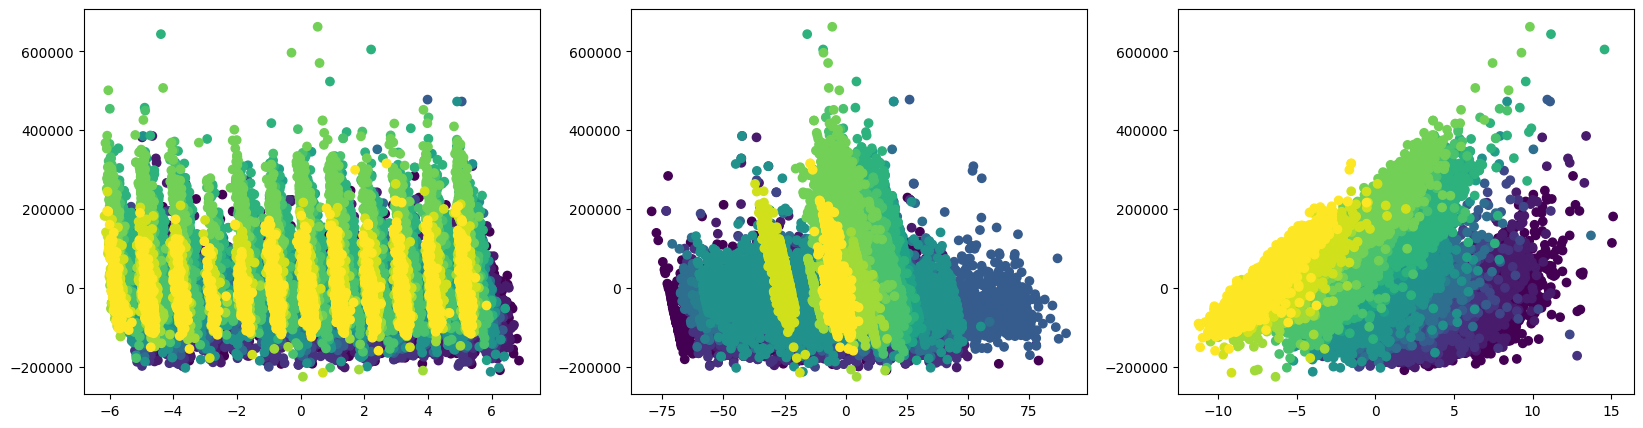

In [262]:
# visualize newly reduced dataset
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5

# visualize genres
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=df["genre"])
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=df["genre"])
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=df["genre"])
plt.show()

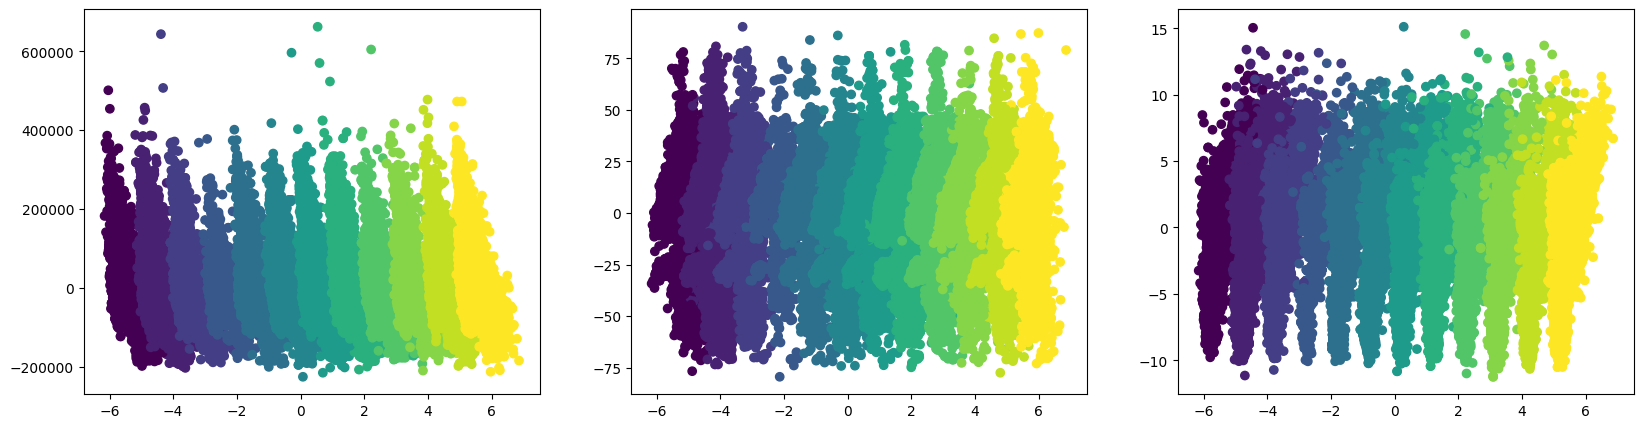

In [264]:
# visualize newly reduced dataset
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5

# visualize keys
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=df["key"])
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=df["key"])
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=df["key"])
plt.show()

**K-Means Playlist Generation**

In [242]:
def find_optimal_cluster(model, data):
    scores, silhouettes = [], []
    if model == 'K-Means':
        for i in range(4, 24):
            km = KMeans(n_clusters=i)
            km.fit(data)
            score = -km.score(data)
            print(f"Score for {i} clusters : {score}\n")
            scores.append(score)
    elif model == 'GMM':
        for i in range(4, 24):
            gmm = GaussianMixture(n_components=i).fit(data)
            score = -gmm.score(data)
            print(f"Score for {i} clusters : {score}\n")
            scores.append(score)
    return scores
    

Score for 4 clusters : 41218893302863.02

Score for 5 clusters : 28097456104809.523

Score for 6 clusters : 20768986544534.855

Score for 7 clusters : 15894947643496.15

Score for 8 clusters : 12413362349180.967

Score for 9 clusters : 10175481561377.664

Score for 10 clusters : 8374436814052.855

Score for 11 clusters : 7120310498254.82

Score for 12 clusters : 6060777691043.944

Score for 13 clusters : 5284857037874.311

Score for 14 clusters : 4586962212168.455

Score for 15 clusters : 4013068020391.4067

Score for 16 clusters : 3549197269102.537

Score for 17 clusters : 3174404419097.3564

Score for 18 clusters : 2827889881647.8096

Score for 19 clusters : 2547727173081.4536

Score for 20 clusters : 2309670266050.5596

Score for 21 clusters : 2079888511225.2603

Score for 22 clusters : 1912062675421.336

Score for 23 clusters : 1753123344221.6077



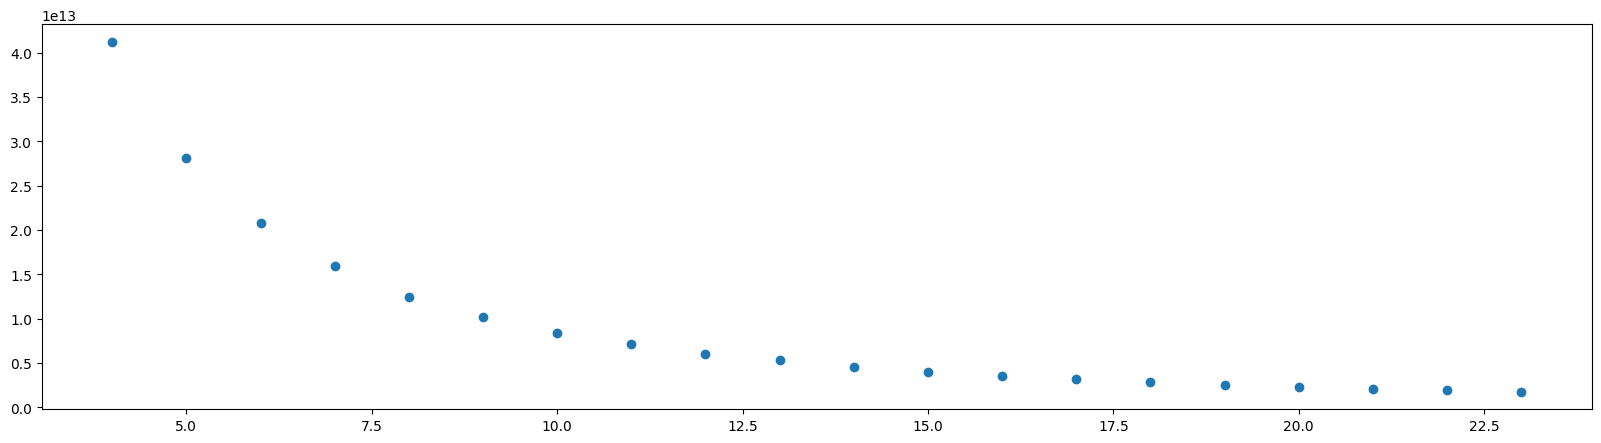

In [232]:
# find the optimal number of playlists
scores = find_optimal_cluster("K-Means", df_reduced)

# plot the results to manually extract the optimal value
plt.scatter(np.arange(4,24), scores)
plt.show()

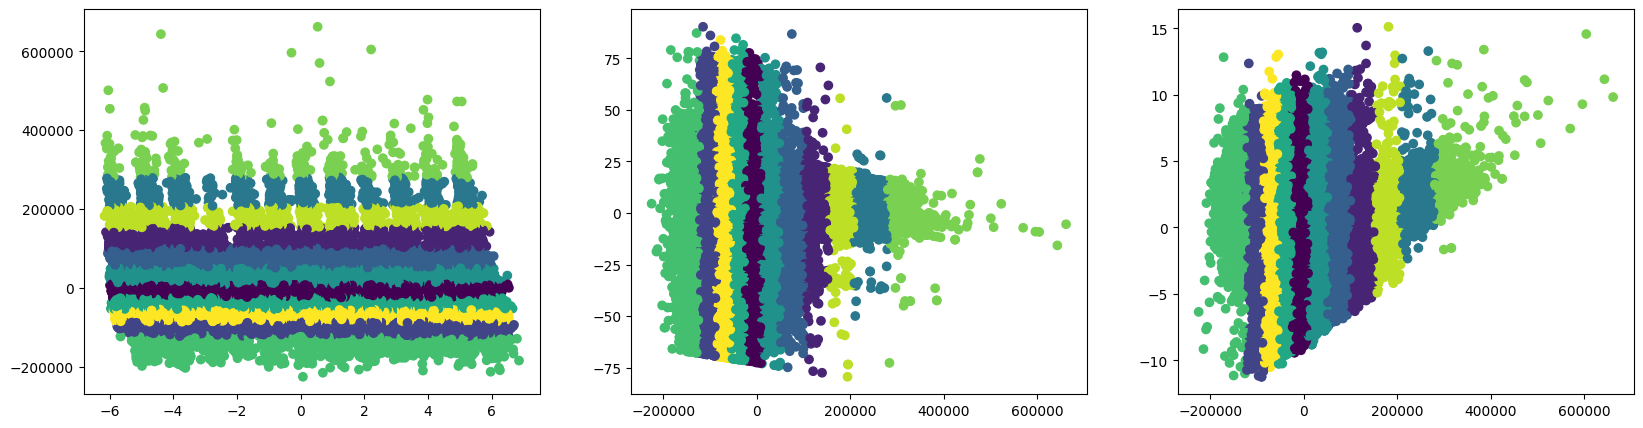

In [236]:
# fit the kmeans model to entire songlist
km = KMeans(n_clusters=11)
km.fit(df_reduced)

# classify data into separate playlists
playlists = km.labels_

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**GMM Playlist Generation**

Score for 4 clusters : 22.286433368138795

Score for 5 clusters : 22.27090708641194

Score for 6 clusters : 22.22956813242264

Score for 7 clusters : 22.261554416561395

Score for 8 clusters : 22.19961181806518

Score for 9 clusters : 22.160495197988126

Score for 10 clusters : 22.143705611943357

Score for 11 clusters : 21.941305250192592

Score for 12 clusters : 22.11425836897458

Score for 13 clusters : 22.114043425201

Score for 14 clusters : 21.730679205930148

Score for 15 clusters : 21.87737719351325

Score for 16 clusters : 21.713965420414365

Score for 17 clusters : 21.678601394072135

Score for 18 clusters : 21.9051960261835

Score for 19 clusters : 21.692832626426107

Score for 20 clusters : 21.590850165542648

Score for 21 clusters : 21.72158370101846

Score for 22 clusters : 21.71450573651305

Score for 23 clusters : 21.720869790967022



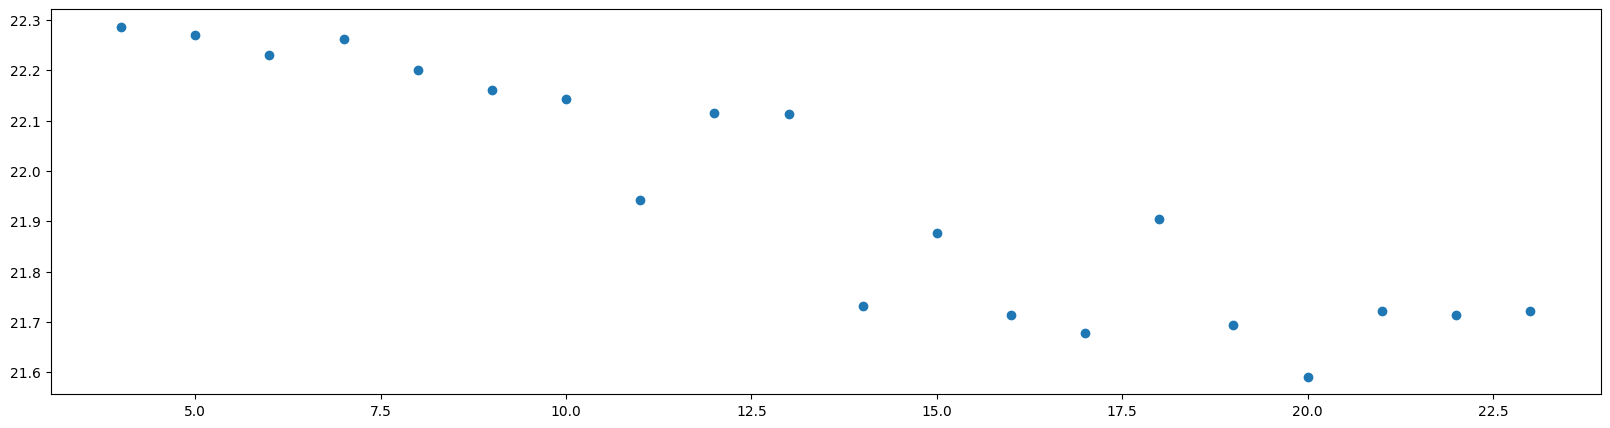

In [243]:
# find the optimal number of playlists
scores = find_optimal_cluster("GMM", df_reduced)

# plot the results to manually extract the optimal value
plt.scatter(np.arange(4,24), scores)
plt.show()

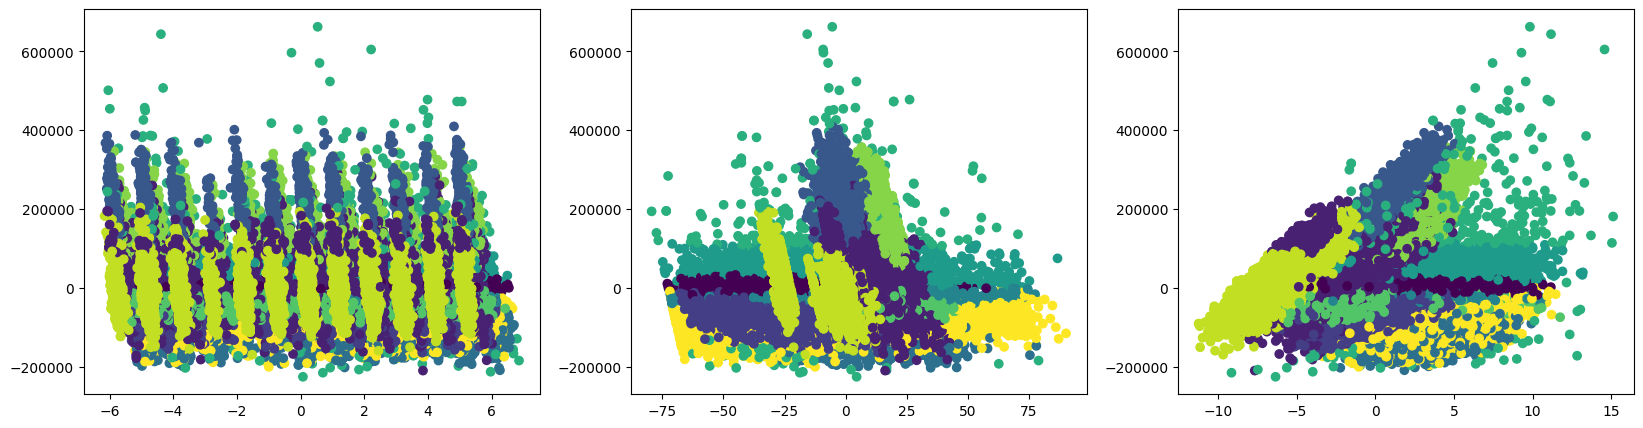

In [279]:
# fit the gmm model to entire songlist
gmm = GaussianMixture(n_components=12, init_params='k-means++')
gmm.fit(df_reduced)

# classify data into separate playlists
playlists = gmm.predict(df_reduced)

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**OPTICS Clustering Playlist Generation**

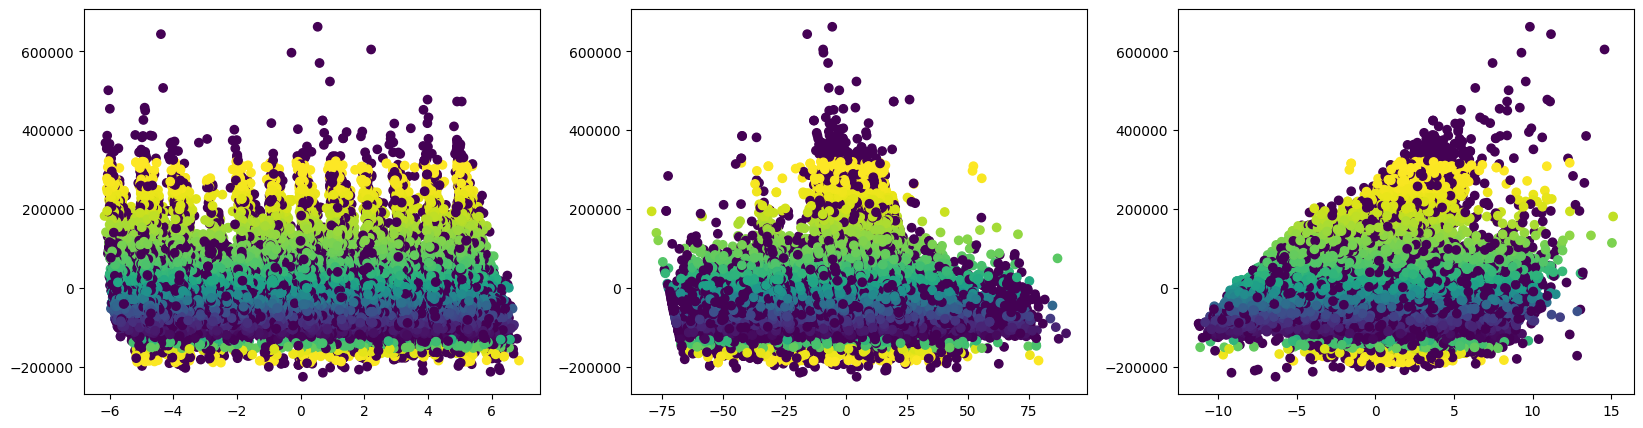

In [239]:
# fit the kmeans model to entire songlist
op = OPTICS(min_samples=10)
op.fit(df_reduced)

# classify data into separate playlists
playlists = op.labels_

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**Spectral Clustering Playlist Generation**

In [ ]:
# fit the spectral clustering model to entire songlist
# and classify data into separate playlists
sc = SpectralClustering(n_clusters=12)
playlists = sc.fit_predict(df_reduced)

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 10, 2
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=playlists)
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=playlists)

**Quick Visualization of Playlist Classification**

Here we will show how different attributes influence the playlist classifier

In [277]:
def print_playlist(playlist_dict, allow_empty_name, num_songs):
    for i, playlist in enumerate(playlist_dict.values()):
        if not allow_empty_name:
            playlist = playlist[playlist["song_name"].notna()]
        if len(playlist) > num_songs:
            mode = st.mode(playlist["genre"])
            genre = genres.tolist()[mode.mode[0]]
            print(f"{i} : {genre}")
            print(playlist.sample(n=num_songs)["song_name"])

C:\Users\jeanp\AppData\Local\Temp\ipykernel_25548\3266924176.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(playlist["genre"])


0 : Rap
12518                                           The Middle
15204                               Dark Sky (Skyscrapers)
10614    BE SILENT WHEN THE KING IS SPEAKING [PROD. $TR...
15664            Don't Come Out The House (with 21 Savage)
14878                            Double (feat. NLE Choppa)
13359                             Consequences - orchestra
18272                                                Fancy
Name: song_name, dtype: object
1 : Hiphop
19315                                          The Morning
18228    Give Me Everything (feat. Ne-Yo, Afrojack & Na...
20312                                          The Morning
21224                                            Free Meal
18588    Lean Back (feat. Lil Jon, Eminem, Mase & Remy ...
19078                                              No Love
17426                     Mona Lisa (feat. Kendrick Lamar)
Name: song_name, dtype: object
2 : Hiphop
15377                  Whole Lot
16993    What Dreams Are Made Of
6606     Still D

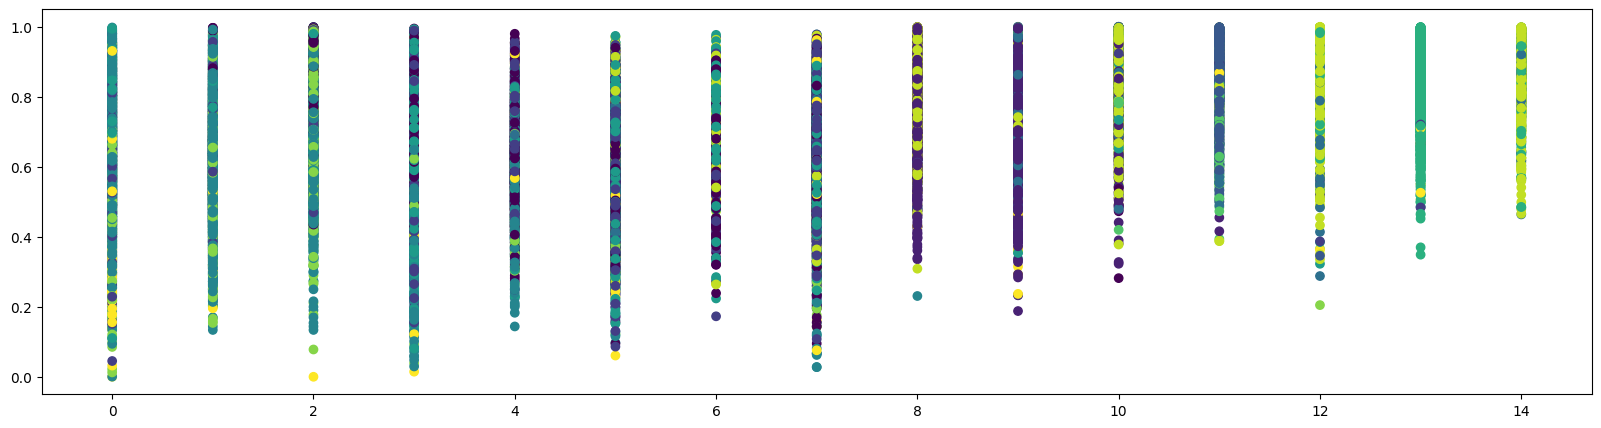

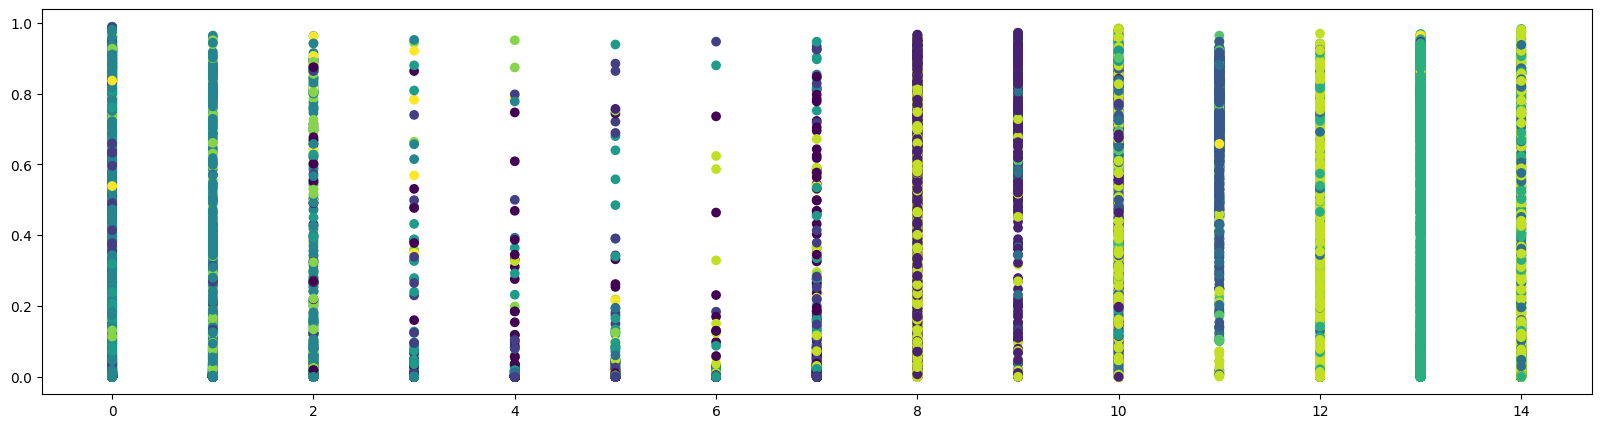

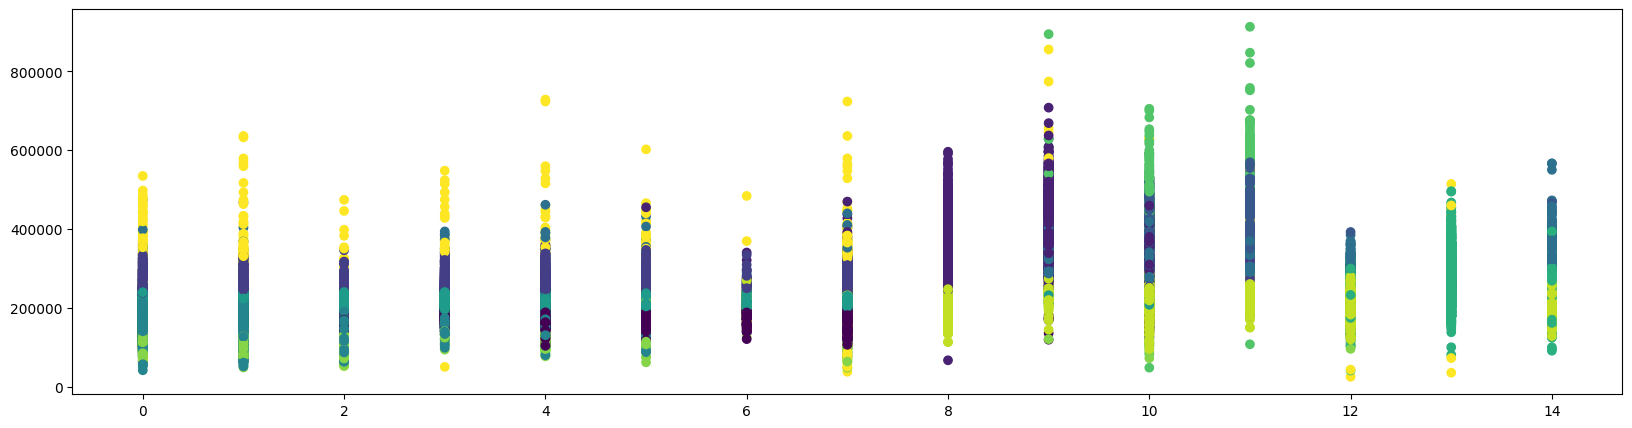

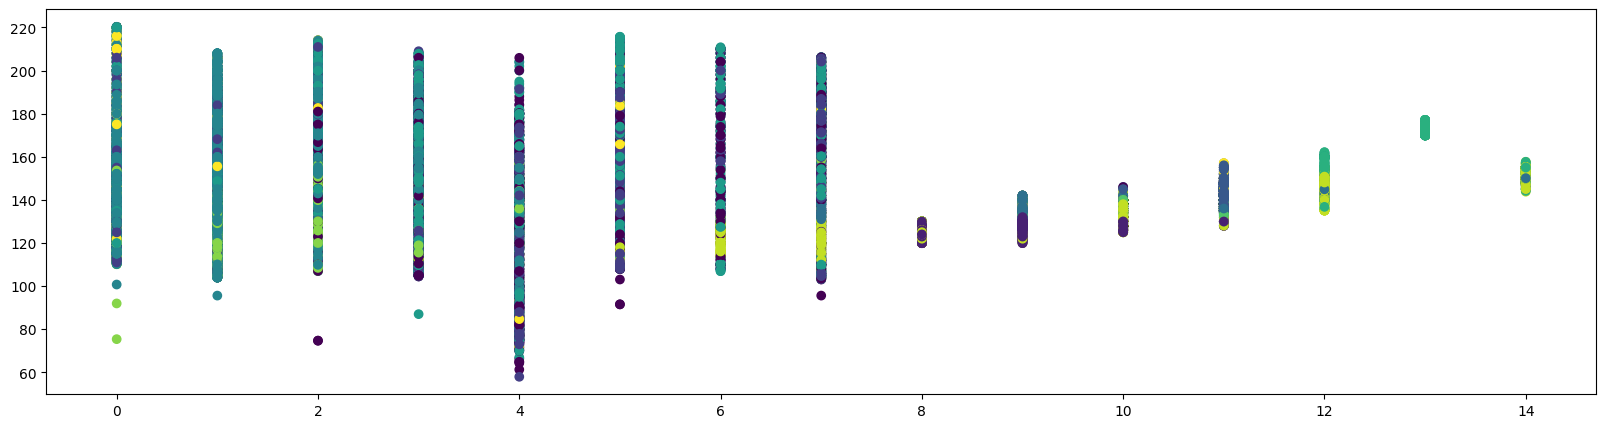

In [278]:
# add the new playlist feature
df["playlist"] = playlists

# add back our song name feature
df["song_name"] = songs

# group songs by playlist
playlist_dict = dict(tuple(df.groupby("playlist")))
print_playlist(playlist_dict, allow_empty_name=False, num_songs=7)

plt.scatter(df["genre"], df["energy"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["instrumentalness"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["duration_ms"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["tempo"], c=playlists)
plt.show()

**Playlist Name Generation**

**Classifying New Songs**